## Training a decision tree

`sklearn.datasets.load_digits` is a dataset of 8 by 8 images of numbers.
In this assignment, you will train a decision tree classifier with sklearn and tune the parameter to get better accuracy.

In [103]:
# Run the following code to get your training data and test data
seed = 20190327
import sklearn.datasets
from sklearn.model_selection import train_test_split
Load_digits = sklearn.datasets.load_digits()
X_train, X_test, y_train, y_test = train_test_split(Load_digits.data,
                                                    Load_digits.target, 
                                                    test_size=0.2, 
                                                    random_state=seed)

### In this assignment, you are required to:

1. Train a model and test its accuracy

    ***Note***: Use `random_state=seed` as an argument of the model so as to get consistent results.
    
2. Tune the parameter to get better performance 

 ***Note***: In order to get full marks, you need to show your work how you choose the best perameters, rather than just showing what the best parameter is.

In [104]:
# 1. import model from sklearn

from sklearn import tree
clf = tree.DecisionTreeClassifier()

In [105]:
# 2. train you model with X_train and y_train

clf = clf.fit(X_train, y_train)

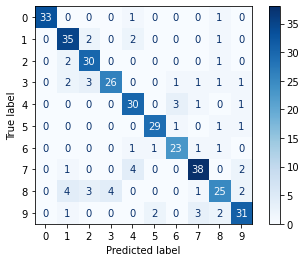

Accuracy of the model: 0.8333333333333334


In [106]:
# 3. test your performance on X_test and y_test

from sklearn.metrics import accuracy_score, plot_confusion_matrix

# You can use accuracy_score to get accuracy of you model. You may also compute the score manually.
import matplotlib.pyplot as plt

def performance(clf):
    y_pred = clf.predict(X_test)
    disp = plot_confusion_matrix(clf, X_test, y_test, cmap=plt.cm.Blues)
    plt.show()
    print('Accuracy of the model:', accuracy_score(y_test, y_pred))

performance(clf)



There are several parameters to tune in a decision tree model, (e.g., `max_depth`, `max_features`, `max_leaf_nodes`, `min_samples_leaf`, `min_samples_split`). Try to tune your model by choosing the values for 1 ~ 3 parameters using cross validation. For example:

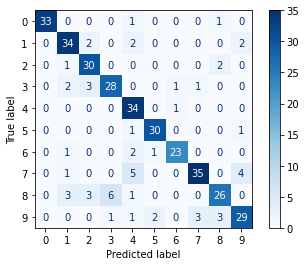

Accuracy of the model: 0.8388888888888889


In [107]:
# 4. Try different max_depth and pick the best one

from ipywidgets import interactive

#max_depth = 10
model10 = tree.DecisionTreeClassifier(max_depth=10, random_state=seed)
# change the number of the max_depth and run this cell recurrently to find the best max_depth
model10 = model10.fit(X_train, y_train)
performance(model10)

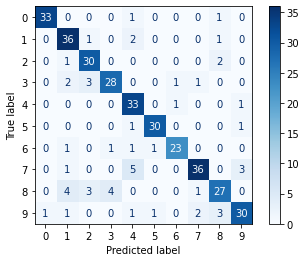

Accuracy of the model: 0.85


In [108]:
#max_depth = 11
model11 = tree.DecisionTreeClassifier(max_depth=11, random_state=seed)
# change the number of the max_depth and run this cell recurrently to find the best max_depth
model11 = model11.fit(X_train, y_train)
performance(model11)

In [109]:
# 4.1 You may choose more parameters to tune
from IPython.display import SVG
from graphviz import Source
from IPython.display import display

def plot_tree(features, nodes, min_split, min_leaf):
  estimator = tree.DecisionTreeClassifier(random_state = seed
      , max_depth = best_depth
      , max_features = features
      , max_leaf_nodes = nodes
      , min_samples_split=min_split
      , min_samples_leaf=min_leaf)
  estimator.fit(X_train, y_train)
  performance(estimator)
  graph = Source(tree.export_graphviz(estimator
      , out_file=None
      , feature_names=Load_digits.feature_names
      , class_names=['0', '1', '2', '3', '4', '5', '6', '7', '8', '9', '10', '11']
      , filled = True))
   
  display(SVG(graph.pipe(format='svg')))
  return estimator

inter=interactive(plot_tree 
   , features = (40, 60)
   , nodes = [None, 10, 20, 30, 40, 50, 60]
   , min_split=[0.001, 0.01, 0.1]
   , min_leaf= [0.0001, 0.001, 0.01])
   
display(inter)

interactive(children=(IntSlider(value=50, description='features', max=60, min=40), Dropdown(description='nodes…

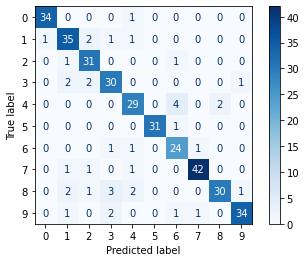

Accuracy of the model: 0.8888888888888888


In [110]:
# 5. Show your best result
best_features = 51
best_nodes = None
best_min_split = 0.001
best_min_leaf = 0.0001
best_model = tree.DecisionTreeClassifier(
        max_depth = best_depth
      , max_features = best_features
      , max_leaf_nodes = best_nodes
      , min_samples_split= best_min_split
      , min_samples_leaf= best_min_leaf
      , random_state = seed)
best_model = best_model.fit(X_train, y_train)
performance(best_model)